# 準備

In [14]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\0175216\AppData\Local\Continuum\anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\0175216\AppData\Local\Continuum\anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\0175216\AppData\Local\Continuum\anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 混合行列(Confusion Matrix)

## 評価指標・導出方法

それぞれあるデータに対してモデルが下した評価について「観測結果に対する予測結果の正解・不正解」と「モデルが判断した予測結果」をまとめたもの。

「観測結果に対する予測結果の正解・不正解」は

- 正解：True  
- 不正解：False

の二つがある。  

この中で、True、Falseそれぞれの場合について、  
2クラス問題の場合、「モデルが判断した予測結果」も

- 陽：Positive
- 陰：Negative

の二つの結果がある。

この時、すべての結果と評価の組み合わせは以下の4パターンに分けられる。

- True
  - 評価：陽（P）　と判断した時に　事実：陽　である場合　＝（TP）
  - 評価：陰（N）　と判断した時に　事実：陰　である場合　＝（TN）

- False
  - 評価：陽（P）　と判断した時に　事実：陰　である場合　＝（FP）
  - 評価：陰（N）　と判断した時に　事実：陽　である場合　＝（FN）
  
これをまとめたものを混合行列という。以下に表を示す。
 
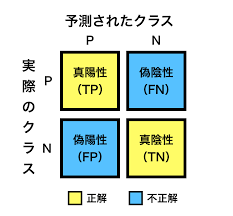
  

## sklearnにおける使用例

In [23]:
from sklearn.metrics import confusion_matrix

# データセットの読み取り(がんの推測)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size=0.7, random_state=1)

# モデルの構築
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 混合行列の表示
print(confusion_matrix(y_test, lr.predict(X_test)))

[[ 57   6]
 [  2 106]]


# 正答率(Accuracy)

## 評価指標・導出方法

すべてデータに対して、観測結果と予測結果がどれだけ正解していたかを評価する値。

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

## 評価指標の特性

- どれだけモデルが正解していたかを確認することができる。

## sklearnにおける使用例

In [25]:
from sklearn.metrics import accuracy_score

# データセットの読み取り(がんの推測)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size=0.7, random_state=1)

# モデルの構築
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 正答率の表示
print(accuracy_score(y_test, lr.predict(X_test)))

0.9532163742690059


# 適合率(Precision)

## 評価指標・導出方法

モデルがPositive（陽性）と判断した対象について、どれだけが本当にPositiveだったかを示す値。混合行列の要素を用いて以下の様に示せる。

$$
Precision = \frac{TP}{TP + FP}
$$

## 評価指標の特性

- モデルが陽性といったものがどれだけ本当に陽性かがわかる(陽性とした判断の信憑性がわかる)

## sklearnにおける使用例

In [26]:
from sklearn.metrics import precision_score

# データセットの読み取り(がんの推測)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size=0.7, random_state=1)

# モデルの構築
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 適合率の表示
print(precision_score(y_test, lr.predict(X_test)))

0.9464285714285714


# 再現率(Recall)

## 評価指標・導出方法

モデルが実際にPositive（陽性）のデータをどれだけ抽出することができたかを評価する値。

$$
Recall = \frac{TP}{TP + FN}
$$

## 評価指標の特性

- モデルが実際に陽性のデータをどれだけ抽出できるかを評価できる。

## sklearnにおける使用例

In [27]:
from sklearn.metrics import recall_score

# データセットの読み取り(がんの推測)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size=0.7, random_state=1)

# モデルの構築
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 再現率の表示
print(recall_score(y_test, lr.predict(X_test)))

0.9814814814814815


# 交差エントロピー誤差(Cross Entropy Loss; Log Loss)

## 評価指標・導出方法

とある分類における観測結果の種類の数をn、各観測結果の種類をi、その種類に対する観測結果$p_i$が出現する確率と、予測結果が出現する$q_i$を用いて交差エントロピーの値は以下の様に示される。

$$
E =-\displaystyle\sum_{i=1}^np_i\log q_i
$$

ここで、機械学習における分類問題においては観測結果$p_i$が0と1のラベルで表現されており、それに対する予測結果$q_i$はすなわち正解しているラベルに対する出現確率であるので、q_iが正解に対する予測結果の割合とすると

$$
E = -\log q_i
$$

で示される。

## 評価指標の特性

- 交差エントロピー誤差の値は観測結果と予測結果の誤差が大きい($q_i=0$)ときは値が大きくなり、観測結果と予測結果の誤差が小さい($q_i=1$)ときは0に近くなる。以下の表参照
- 交差エントロピー誤差は誤差が大きい値の時、傾きが収束の方向に大きく動くため、使用されることが多い

![](https://manareki.com/wp-content/uploads/2019/03/log.png)
$p(k)=p_i$です。。。。

## sklearnにおける使用例

In [59]:
from sklearn.metrics import log_loss

# データセットの読み取り(がんの推測)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size=0.7, random_state=1)

# モデルの構築
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 交差エントロピー誤差の表示(predictではなくpredict_probaを渡すことに注意！！)
log_loss(y_test, lr.predict_proba(X_test))

0.11655963246028916

終わり